In [149]:
from bs4 import BeautifulSoup
import urllib.request as REQ #http통신하는 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')
import folium
import urllib
import json
from datetime import datetime
from pandas_datareader import data
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [150]:
titanic = sns.load_dataset('titanic')
titanic[:5]

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [151]:
# 1. deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시요
titanic = sns.load_dataset('titanic')
titanic.drop(columns='deck',inplace=True)
titanic.dropna(subset=['age'], inplace=True)
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [152]:
# 2. 생존자와 사망자에 대한 갯수를 구하시요
live= titanic[titanic['survived'] == 1]['survived'].count()
dead= titanic[titanic['survived'] == 0]['survived'].count()

print('생존자 : %d명'%live)
print('사망자 : %d명'%dead)

생존자 : 290명
사망자 : 424명


In [157]:
# 3. 등급별(pclass) 평균 생존률을 구하시요
def liverate(n):
    live= titanic[(titanic['pclass'] == n) & (titanic['survived'] == 1)]['survived'].count()
    dead= titanic[(titanic['pclass'] == n) & (titanic['survived'] == 0)]['survived'].count()
    return (live / (live+dead))*100

print('1등급 승객 생존율 %d%%'%liverate(1))
print('2등급 승객 생존율 %d%%'%liverate(2))
print('3등급 승객 생존율 %d%%'%liverate(3))


1등급 승객 생존율 65%
1등급 승객 생존율 47%
1등급 승객 생존율 23%


In [158]:
# 4. SibSp(가족과탑승) 의 평균 생존율을 구하시요
live = titanic[(titanic['sibsp'] == 1) & (titanic['survived'] == 1)]['survived'].count()
dead = titanic[(titanic['sibsp'] == 1) & (titanic['survived'] == 0)]['survived'].count()
print('가족과 탑승한 사람의 생존율 %d%%'%((live/(live+dead))*100))

가족과 탑승한 사람의 생존율 53%


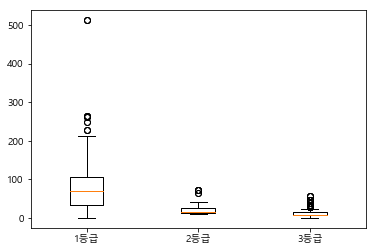

In [155]:
# 5. 등급별 티켓비용(fare) 의 평균 차트로 그리시요
t1=titanic[titanic['pclass'] == 1]['fare']
t2=titanic[titanic['pclass'] == 2]['fare']
t3=titanic[titanic['pclass'] == 3]['fare']
plt.boxplot([t1,t2,t3], labels=['1등급','2등급','3등급'])
plt.show()

In [160]:
#6 혼자 탑승한 인원의 생존율
live = titanic[(titanic['sibsp'] == 0) & (titanic['survived'] == 1)]['survived'].count()
dead = titanic[(titanic['sibsp'] == 0) & (titanic['survived'] == 0)]['survived'].count()
print('혼자 탑승한 사람의 생존율 %d%%'%((live/(live+dead))*100))

혼자 탑승한 사람의 생존율 37%


In [162]:
#7 성별 평균 생존율
live = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['survived'].count()
dead = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 0)]['survived'].count()
print('남자의 생존율 %d%%'%((live/(live+dead))*100))

live = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['survived'].count()
dead = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 0)]['survived'].count()
print('여자의 생존율 %d%%'%((live/(live+dead))*100))

남자의 생존율 20%
여자의 생존율 75%
